# Homework 4 - Getting to know your customers

## 1. Finding Similar Costumers

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
bank_transictions = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\ADM_HW4\bank_transactions.csv")
bank_transictions.dropna(inplace=True)

<AxesSubplot:xlabel='CustGender', ylabel='Count'>

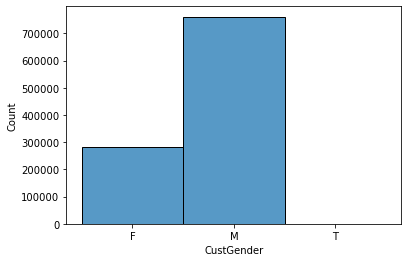

In [3]:
sns.histplot(bank_transictions['CustGender'])

In [4]:
bank_transictions = bank_transictions[(bank_transictions.CustGender != 'T')]

<AxesSubplot:xlabel='CustGender', ylabel='Count'>

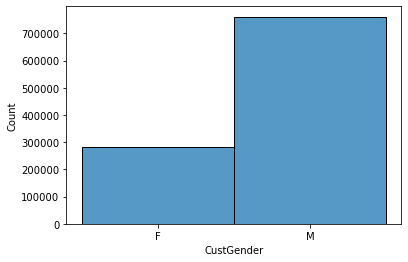

In [5]:
sns.histplot(bank_transictions['CustGender'])

In [6]:
bank_transictions.CustomerDOB = pd.to_datetime(bank_transictions.CustomerDOB) 
bank_transictions['CustomerAge'] = (( pd.to_datetime('today') - bank_transictions.CustomerDOB ) / np.timedelta64(1, 'Y')).round(0)

<AxesSubplot:xlabel='CustomerAge', ylabel='Count'>

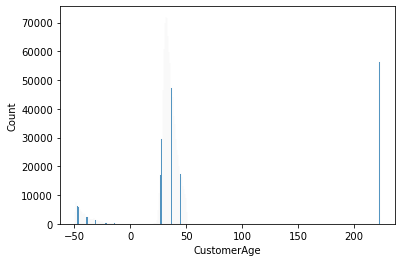

In [7]:
sns.histplot(bank_transictions['CustomerAge'])

In [8]:
bank_transictions = bank_transictions[bank_transictions["CustomerAge"] < 100]
bank_transictions = bank_transictions[bank_transictions["CustomerAge"] > 0 ]

<AxesSubplot:xlabel='CustomerAge', ylabel='Count'>

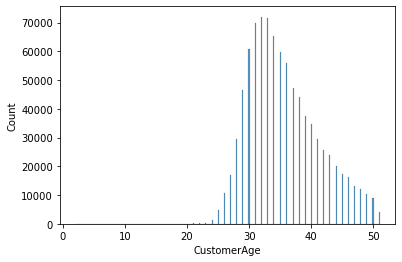

In [9]:
sns.histplot(bank_transictions['CustomerAge'])

In [10]:
users = bank_transictions[['CustomerID', 'CustGender', 'CustLocation', 'CustomerAge', 'CustAccountBalance']]
users = users.drop_duplicates()

In [11]:
final_users = users[['CustGender', 'CustLocation', 'CustomerAge', 'CustAccountBalance']]
final_users

,CustGender,CustLocation,CustomerAge,CustAccountBalance
0,F,JAMSHEDPUR,28.0,17819.05
2,F,MUMBAI,26.0,17874.44
3,F,MUMBAI,49.0,866503.21
4,F,NAVI MUMBAI,35.0,6714.43
5,F,ITANAGAR,50.0,53609.20
...,...,...,...,...
1048562,M,NEW DELHI,32.0,7635.19
1048563,M,NASHIK,31.0,27311.42
1048564,M,HYDERABAD,34.0,221757.06
1048565,M,VISAKHAPATNAM,44.0,10117.87


In [12]:
query = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\ADM_HW4\query_users.csv")

In [13]:
query = query[(query.CustGender != 'T')]
query.CustomerDOB = pd.to_datetime(query.CustomerDOB) 
query['CustomerAge'] = (( pd.to_datetime('today') - query.CustomerDOB ) / np.timedelta64(1, 'Y')).round(0)
query = query[query["CustomerAge"] < 100]
query = query[query["CustomerAge"] > 0 ]

In [14]:
final_query = query[['CustGender', 'CustLocation', 'CustomerAge', 'CustAccountBalance']]
final_query

,CustGender,CustLocation,CustomerAge,CustAccountBalance
0,M,DELHI,44.0,94695.61
1,M,PANCHKULA,30.0,7584.09
2,M,PATNA,31.0,7180.60
3,M,CHENNAI,36.0,56847.75
4,M,GURGAON,28.0,84950.13
5,M,WORLD TRADE CENTRE BANGALORE,41.0,23143.95
6,F,CHITTOOR,46.0,15397.80
7,M,MOHALI,31.0,426.30
8,M,MOHALI,33.0,4609.34
10,M,BANGALORE,34.0,5974.56


In [15]:
def permute(x, a, b, c):
    return (a*x + b) % c

def minHash(elem, listOfValues, c):
    for a,b in listOfValues:
        return min([permute(hash(elem), a, b, c)])

def create_signature(row, permutations, c):
    signature = np.zeros(len(row), int)
    for idx, elem in enumerate(row):
        value = minHash(elem, permutations, c)
        signature[idx] = value
    return signature

In [16]:
nPermutations = 30
permutations = [(random.randint(0,45), random.randint(0,45)) for _ in range(nPermutations)]

final_users['signature'] = [create_signature(row, permutations, 5000) for row in final_users.to_numpy()]

In [17]:
final_query['signature'] = [create_signature(row, permutations, 5000) for row in final_query.to_numpy()]

C:\Users\Marina\AppData\Local\Temp\ipykernel_23712\2090606936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_query['signature'] = [create_signature(row, permutations, 5000) for row in final_query.to_numpy()]


In [18]:
final_users

,CustGender,CustLocation,CustomerAge,CustAccountBalance,signature
0,F,JAMSHEDPUR,28.0,17819.05,"[1574, 4399, 1065, 2444]"
2,F,MUMBAI,26.0,17874.44,"[1574, 151, 991, 2647]"
3,F,MUMBAI,49.0,866503.21,"[1574, 151, 1842, 1848]"
4,F,NAVI MUMBAI,35.0,6714.43,"[1574, 4395, 1324, 4503]"
5,F,ITANAGAR,50.0,53609.20,"[1574, 4000, 1879, 1010]"
...,...,...,...,...,...
1048562,M,NEW DELHI,32.0,7635.19,"[1117, 2987, 1213, 4372]"
1048563,M,NASHIK,31.0,27311.42,"[1117, 3075, 1176, 2872]"
1048564,M,HYDERABAD,34.0,221757.06,"[1117, 2393, 1287, 3374]"
1048565,M,VISAKHAPATNAM,44.0,10117.87,"[1117, 400, 1657, 942]"


In [19]:
final_query

,CustGender,CustLocation,CustomerAge,CustAccountBalance,signature
0,M,DELHI,44.0,94695.61,"[1117, 4090, 1657, 1800]"
1,M,PANCHKULA,30.0,7584.09,"[1117, 3991, 1139, 1637]"
2,M,PATNA,31.0,7180.60,"[1117, 1152, 1176, 4273]"
3,M,CHENNAI,36.0,56847.75,"[1117, 1047, 1361, 536]"
4,M,GURGAON,28.0,84950.13,"[1117, 3709, 1065, 563]"
5,M,WORLD TRADE CENTRE BANGALORE,41.0,23143.95,"[1117, 3144, 1546, 4432]"
6,F,CHITTOOR,46.0,15397.80,"[1574, 1930, 1731, 4998]"
7,M,MOHALI,31.0,426.30,"[1117, 4039, 1176, 3591]"
8,M,MOHALI,33.0,4609.34,"[1117, 4039, 1250, 618]"
10,M,BANGALORE,34.0,5974.56,"[1117, 4233, 1287, 1387]"
